In [1]:
# Install scanpy and loompy if you don't have them
!pip install scanpy
!pip install loompy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.2/119.2 kB 14.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 11.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 10.3 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86832 sha256=9a3469aec07158150eda2fad8bd3c997ac0c254e8fd058e072f93001a46220f2
  Stored in directory: /root/.cache/pip/wheels/3a/70/07/428d2b58660a1a3b431db59b806a10da736612ebbc66c1bcc5
  Created wheel for session-info: filename=session_info-1.0.0-py3-none-any.whl size=8027 sha256=5087262fe25e0e9e9ddfe205f1e46347e843f5e525404993f1f09eba7c07441e
  Stored in directory: /root/.cache/pip/wheels/6a/aa/b9/eb5d4031476ec10802795b97ccf937b9b

In [2]:
# Import the required libraries
import os
import scanpy as sc
import matplotlib.pyplot as plt

In [3]:
# Only for google drive, delete if you are using it locally
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/sc/Laila/')

Mounted at /content/drive


In [4]:
# Load the data
adata=sc.read_h5ad('hypoMap.h5ad')

In [5]:
#Check the variables for subsetting
adata.obs.columns

Index(['SRA_ID', 'Sample_ID', 'organism_ontology_term_id', 'donor_id',
       'development_stage_ontology_term_id', 'sex_ontology_term_id',
       'self_reported_ethnicity_ontology_term_id', 'disease_ontology_term_id',
       'tissue_ontology_term_id', 'cell_type_ontology_term_id',
       'assay_ontology_term_id', 'suspension_type', 'Dataset', 'Batch_ID',
       'nCount_RNA', 'nFeature_RNA', 'percent_mt', 'C7_named', 'C25_named',
       'C66_named', 'C185_named', 'C286_named', 'C465_named',
       'Author_Class_Curated', 'Author_CellType', 'Region_summarized',
       'is_primary_data', 'cell_type', 'assay', 'disease', 'organism', 'sex',
       'tissue', 'self_reported_ethnicity', 'development_stage'],
      dtype='object')

In [6]:
# Genes are labeled by code, change it to feature name
adata.var_names=adata.var.feature_name

/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:947: UserWarning: 
AnnData expects .var.index to contain strings, but got values like:
    ['4933401J01Rik', 'Gm26206', 'Xkr4', 'Gm18956', 'Gm37180']

    Inferred to be: categorical

  names = self._prep_dim_index(names, "var")


In [7]:
#Subset the data
sel_cells=adata[  (adata.obs.sex=='female') &
                  ((adata.obs.development_stage=='2 month-old stage') | (adata.obs.development_stage=='8 weeks') | (adata.obs.development_stage=='9 weeks'))].copy()

/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:183: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [8]:
# Number of cells in the subset
sel_cells.n_obs

72688

In [9]:
# Number of cells per dataset
sel_cells.obs.Dataset.value_counts()

Anderson10x    17666
Rupp10x        17156
Moffit10x      13432
Kim10x         12880
Affinati10x    11554
Name: Dataset, dtype: int64

In [10]:
# Adjust parameters for plotting
plt.rcParams.update({'font.size': 18})
plt.rcParams['figure.figsize']=(6,6) #rescale figures


/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


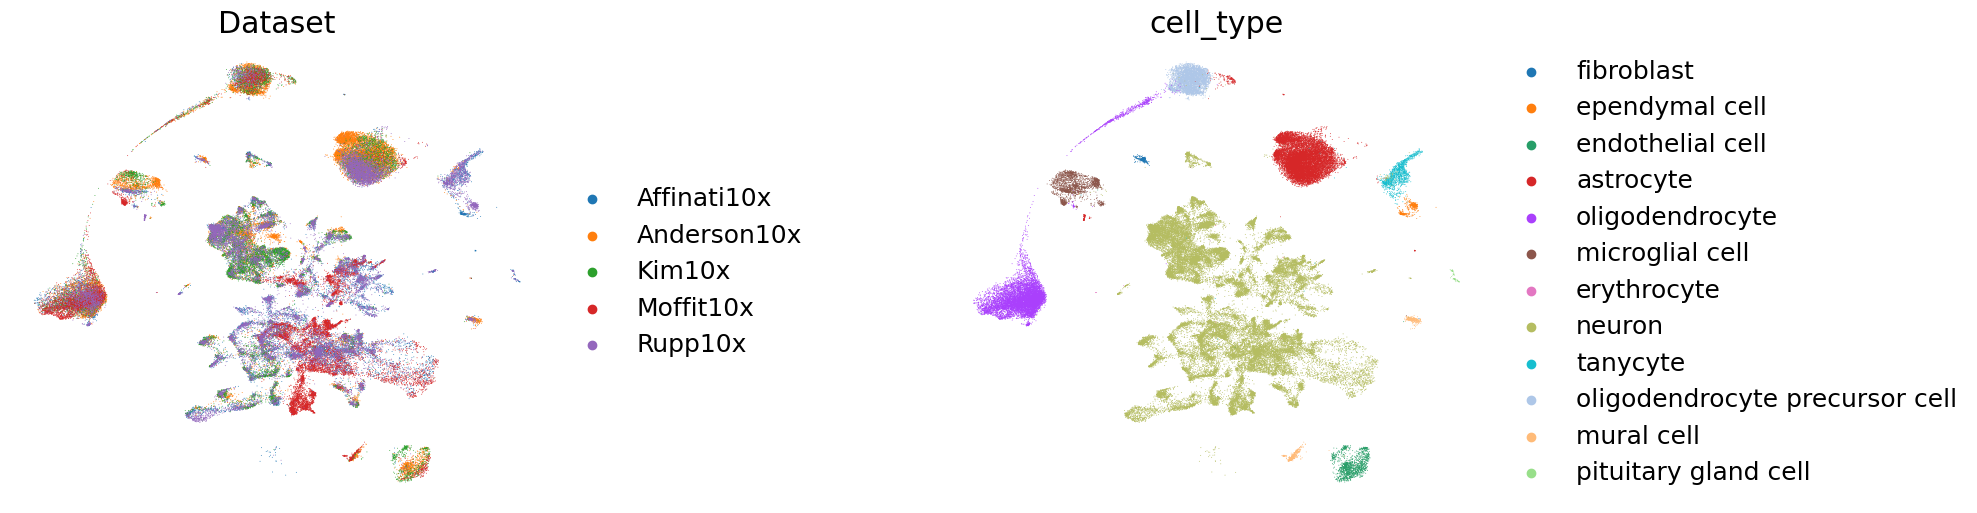

In [11]:
# Plot UMAPs colores by Dataset and cell type labels
sc.pl.umap(sel_cells, color=['Dataset', 'cell_type'],frameon=False, wspace=0.6)


In [12]:
# Make custom colormap to color gene expression levels
from matplotlib.colors import LinearSegmentedColormap
# Define the colors for the colormap
gray_color = [0.8, 0.8, 0.8]  # RGB values for light gray
bright_blue_color = [119/255, 28/255, 172/255]  # RGB values for bright blue
# Create a colormap with a smooth transition from gray to bright blue
cmap_name = 'gray_to_bright_blue'
colors = [gray_color, bright_blue_color]
n_bins = 100  # Number of bins in the colormap
cmap = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

In [13]:
# Increase the plot size to export figure panels
plt.rcParams['figure.figsize']=(12,12) #rescale figures
plt.rcParams.update({'font.size': 24})

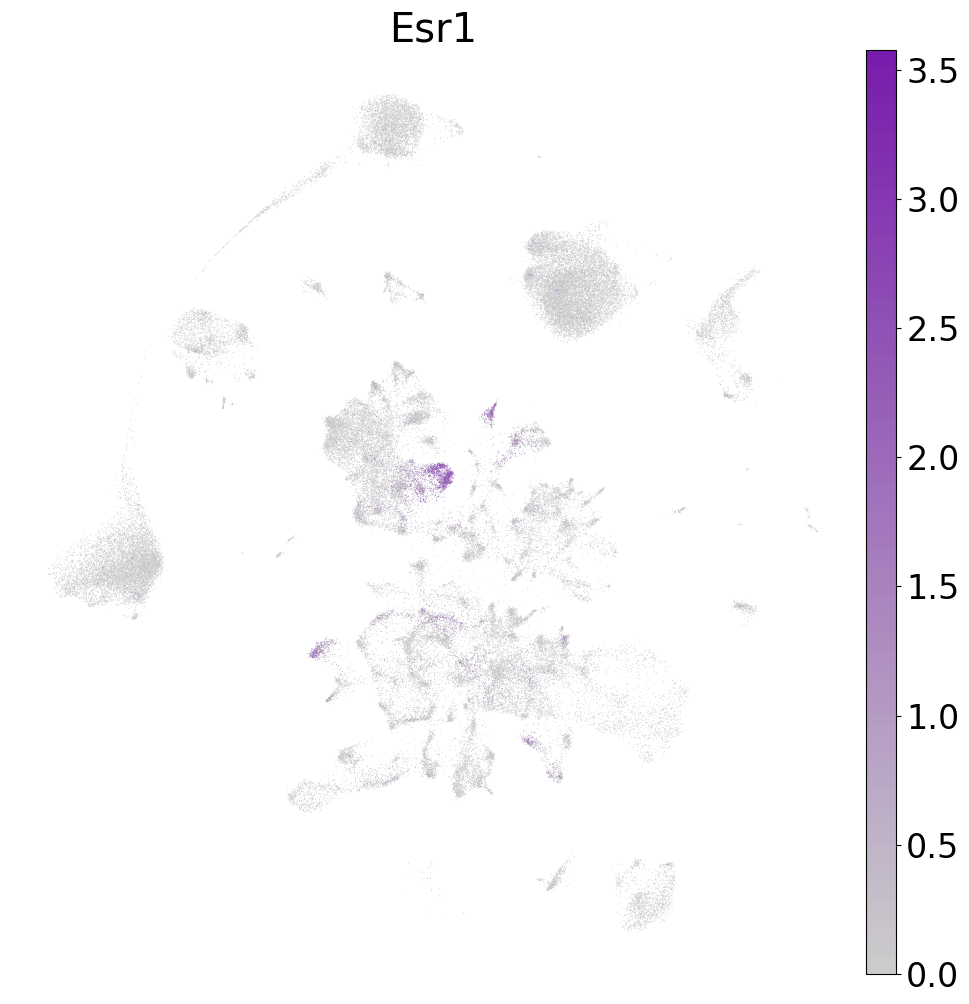

In [14]:
# Plo UMAP and save as PDF
sc.pl.umap(sel_cells, color='Esr1',frameon=False, wspace=0.6, use_raw=False, color_map=cmap,save='Esr1')


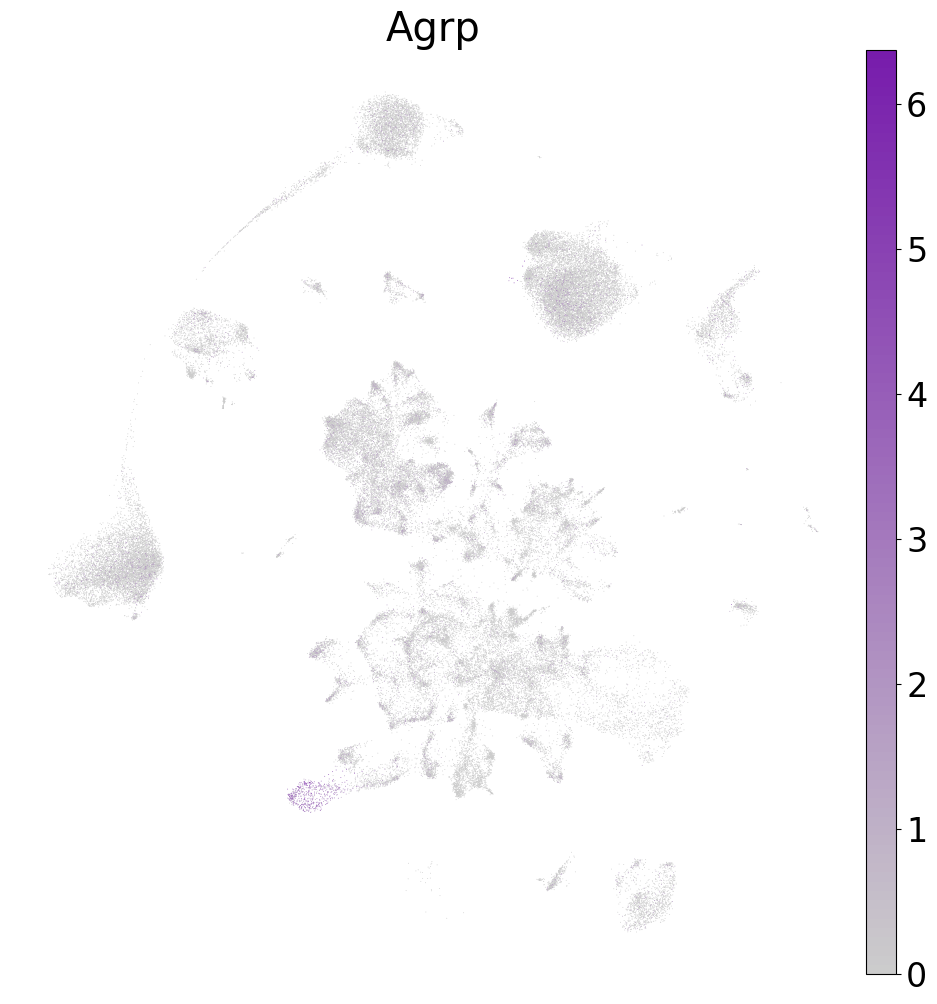

In [15]:
sc.pl.umap(sel_cells, color='Agrp',frameon=False, wspace=0.6, use_raw=False, color_map=cmap,save='Agrp')



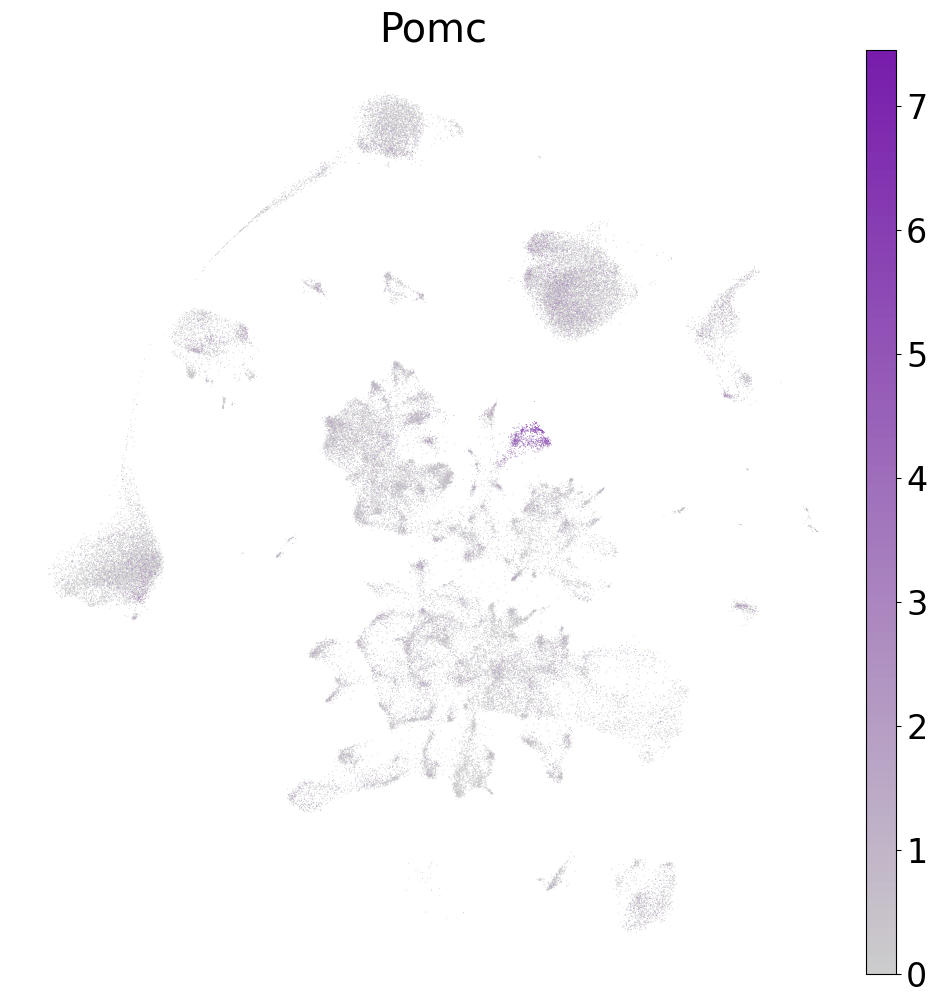

In [16]:
sc.pl.umap(sel_cells, color='Pomc',frameon=False, wspace=0.6, use_raw=False, color_map=cmap,save='Pomc')


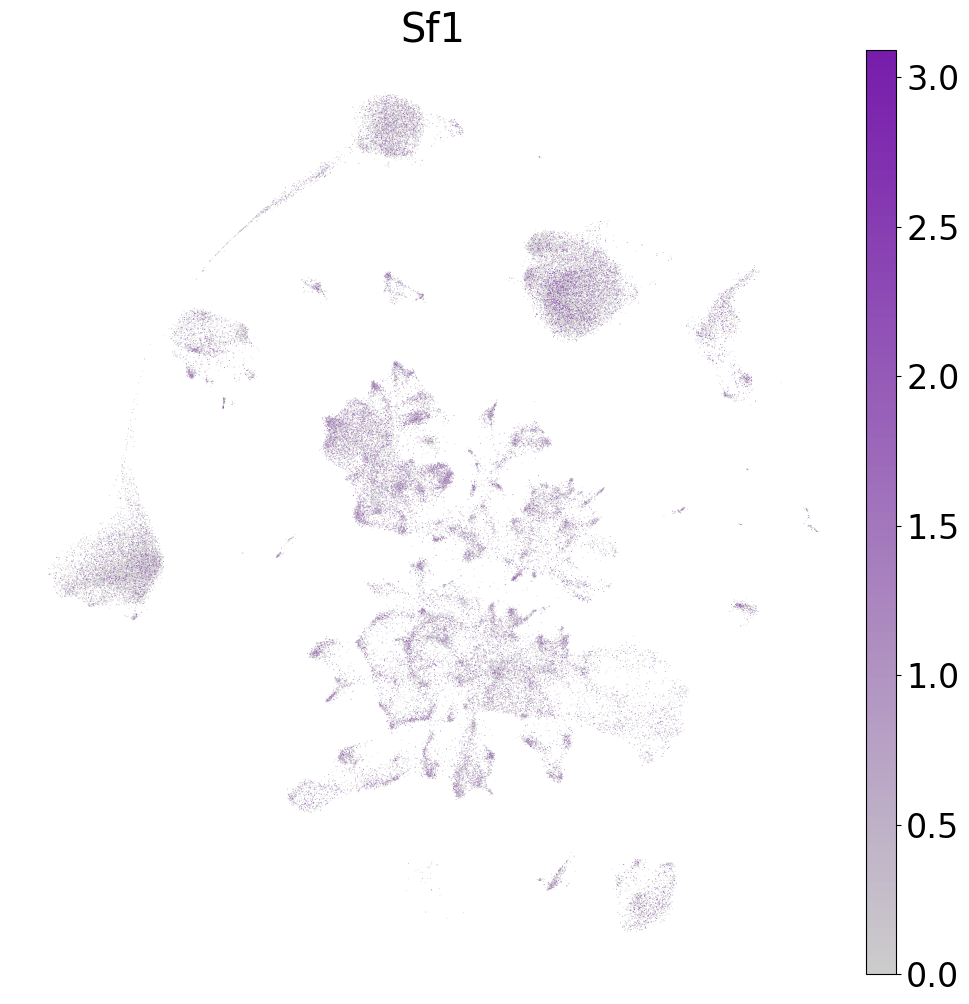

In [17]:
sc.pl.umap(sel_cells, color='Sf1',frameon=False, wspace=0.6, use_raw=False, color_map=cmap, save='Sf1')


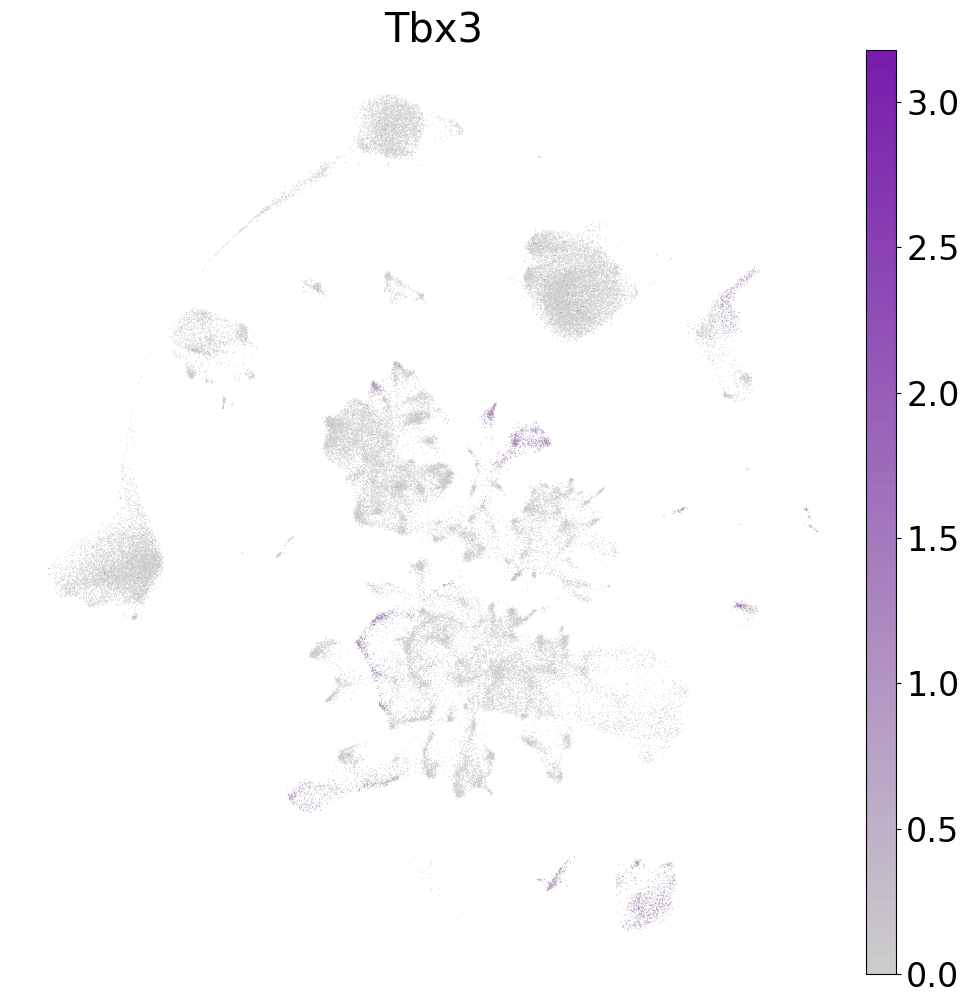

In [18]:
sc.pl.umap(sel_cells, color='Tbx3',frameon=False, wspace=0.6, use_raw=False, color_map=cmap,save='Tbx3')


In [19]:
# Save the obs to a csv file for quick access
sel_cells.obs.to_csv('hypoMap_subset_obs.csv')